# Module 5 Assignment

# sklearn.datasets.load_breast_cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

In [2]:
cancer = load_breast_cancer()
dataset = pd.DataFrame(data = np.c_[cancer["data"]], columns = cancer["feature_names"])
dataset["target"] = pd.Series(data = cancer["target"])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


The dataset used is the breast cancer dataset from the sklearn library called load_breast_cancer().

In [3]:
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(dataset.drop(columns=["target"])))
scaled_features

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


StandardScaler() performs the task of Standardization due to variables that are different in scale in the dataset. The target column is dropped because it is only the features that are used in K-Means clustering.

# Elbow Method

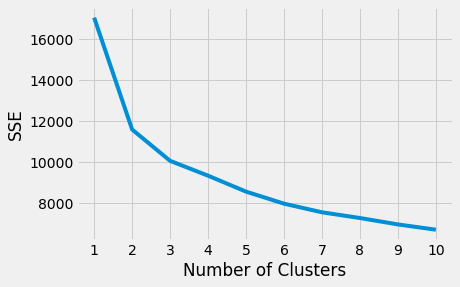

In [4]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Elbow method is used to determine the best value of k for K-Means. When the distortions are plotted and the plot looks like an arm then the "elbow" (the point of inflection on the curve) is the best value of k. In this context, the best value of k is 2.

# k-Means Clustering towards the dataset

In [5]:
starttime = timeit.default_timer()
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_features)
print("Time :", timeit.default_timer() - starttime)

Time : 0.09122950000000074


The scaled_features is directly inputted into the K-Means algorithm. Time computation for this process is 0.0912.

In [6]:
kmeans.inertia_

11595.526607115773

inertia_ stores the sum of squared distances of samples to their closest cluster center. In this context, the inertia value is 11595.527.

In [7]:
kmeans.cluster_centers_

array([[ 0.93362406,  0.4620646 ,  0.96730462,  0.92424266,  0.60116657,
         1.01678879,  1.11927003,  1.13499581,  0.59745592,  0.28828783,
         0.82729086,  0.0408053 ,  0.83306382,  0.77658149,  0.0460656 ,
         0.71559384,  0.64677371,  0.76877382,  0.14483925,  0.45777508,
         1.00100618,  0.48610441,  1.02895252,  0.96525332,  0.61097579,
         0.95149718,  1.0377126 ,  1.12132923,  0.58638203,  0.65089347],
       [-0.48299485, -0.23904142, -0.50041892, -0.47814154, -0.3110035 ,
        -0.52601873, -0.57903569, -0.58717117, -0.30908386, -0.1491409 ,
        -0.42798514, -0.02110994, -0.43097168, -0.40175149, -0.02383127,
        -0.37020054, -0.3345976 , -0.39771232, -0.07493017, -0.23682231,
        -0.51785387, -0.25147802, -0.53231144, -0.49935772, -0.31607814,
        -0.49224121, -0.53684332, -0.58010099, -0.30335497, -0.33672889]])

Centroids of the cluster are stored in the cluster_centers_ shown above.

In [8]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Clustering results of each row are stored in labels_ shown above.

<AxesSubplot:xlabel='0', ylabel='1'>

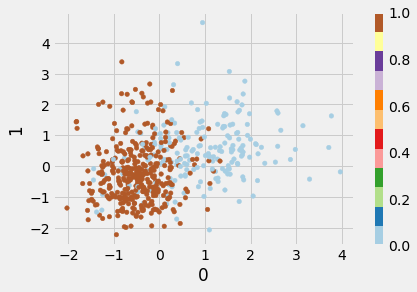

In [9]:
scaled_features.plot(x=0, y=1, kind="scatter", c=kmeans.labels_, colormap="Paired")

The plot above displays clustering results in the axis of column 0 and 1. Blue indicates rows clustered as target 0, meanwhile brown indicates rows clustered as target 1.

# k-Means Clustering for n Principal Components

In [10]:
pca = PCA(n_components=10)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)
df_pca = pd.DataFrame(data=x_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877401
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024065,0.454273
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429910,1.059566,-1.405441,-1.116979
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263805,0.377706
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987927,0.256986
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327,-1.113359,-0.105208,-0.108635
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520878
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542034,-0.089294


Principal Component Analysis (PCA) is used to reduce the dimensionality of large datasets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. In this context, the n value used for PCA is 10.

In [11]:
pca.explained_variance_ratio_.sum()

0.9515688143238135

explained_variance_ratio_ stores the percentage of variance explained by each of the selected components. In this context, sum of the percentage is 0.952.

In [12]:
starttime = timeit.default_timer()
kmeans_pca = KMeans(n_clusters=2)
kmeans_pca.fit(df_pca)
print("Time :", timeit.default_timer() - starttime)

Time : 0.07105139999999999


The PCA result is then inputted into the K-Means algorithm. Time computation for this process is 0.071.

In [13]:
kmeans_pca.inertia_

10770.289988719043

inertia_ stores the sum of squared distances of samples to their closest cluster center. In this context, the inertia value is 10770.290.

In [14]:
kmeans_pca.cluster_centers_

array([[ 4.39306344e+00, -3.75691550e-02, -1.76864649e-01,
        -7.01769805e-02, -4.38460025e-04,  1.16299994e-02,
        -4.34810492e-02,  1.33115042e-02, -9.77506886e-03,
         9.15239255e-03],
       [-2.18497103e+00,  1.86857113e-02,  8.79668913e-02,
         3.49038140e-02,  2.18076170e-04, -5.78439445e-03,
         2.16261008e-02, -6.62072184e-03,  4.86181056e-03,
        -4.55211103e-03]])

Centroids of the cluster are stored in the cluster_centers_ shown above.

In [15]:
kmeans_pca.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Clustering results of each row are stored in labels_ shown above.

<AxesSubplot:xlabel='0', ylabel='1'>

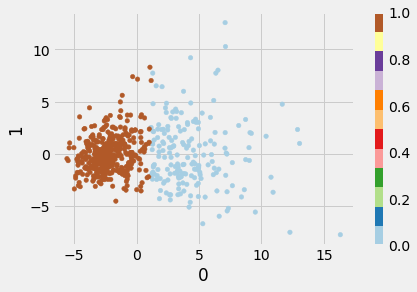

In [16]:
df_pca.plot(x=0, y=1, kind="scatter", c=kmeans_pca.labels_, colormap="Paired")

The plot above displays clustering results in the axis of column 0 and 1. Blue indicates rows clustered as target 0, meanwhile brown indicates rows clustered as target 1.

# Evaluate the quality of both clusters by using Adjusted Rand Index (ARI)

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

### Without PCA

In [17]:
adjusted_rand_score(dataset["target"], kmeans.labels_)

0.6536246043910179

Adjusted rand score for the cluster without PCA is 0.654.

### PCA (n = 10)

In [18]:
adjusted_rand_score(dataset["target"], kmeans_pca.labels_)

0.6707206476880808

Adjusted rand score for the cluster with PCA (n = 10) is 0.671.

# Conclusion

- Quality of clustering with PCA (0.671) is higher than cluster without PCA (0.654).
- Time computation for clustering with PCA (0.071) is faster than cluster without PCA (0.0912).
- The quality and time computation is better because PCA reduces the dimensionality of large datasets without removing the information in the large set.